<a href="https://colab.research.google.com/github/kartikeyadate/future_archive/blob/main/Staggered_Balconies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
#don't need to repeat this every run. Just when the notebook is first opened.


Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/data/dataset04.zip dataset04.zip

In [ ]:
!unzip -qq dataset04.zip
#!rm -rf dataset02/

In [ ]:
import shutil, os, pathlib
#this is a utility provided by keras which takes images from a directory
#and produces a dataset as a numpy array.

from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir = pathlib.Path("dataset04")
img_size = (400, 400)
batch_size = 32

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=img_size,
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=img_size,
    batch_size=batch_size)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=img_size,
    batch_size=batch_size)

for db, lb in train_dataset:
  print("data batch shape:", db.shape)
  print("labels batch shape", lb.shape)
  break



Found 9999 files belonging to 2 classes.
Found 2500 files belonging to 2 classes.
Found 1682 files belonging to 2 classes.
data batch shape: (32, 400, 400, 3)
labels batch shape (32,)


# New Section

In [ ]:
#Defining a basic image classification convnet. 
#There are 2 output layers - "present" and "absent".
#The input data is a 400x400x3 image.

from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(400, 400,3))
data_augmentation = keras.Sequential(
    [
     layers.RandomRotation(0.15),
     layers.RandomZoom(0.3)
    ]
)
x = layers.Rescaling(1./255.0) (inputs)
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5),
              metrics=["accuracy"])

callbacks = [
             keras.callbacks.ModelCheckpoint(filepath="staggered_balconies_01.keras",
                                             save_best_only=True,
                                             monitor="val_loss")
]

model.summary()

history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, callbacks=callbacks)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                         

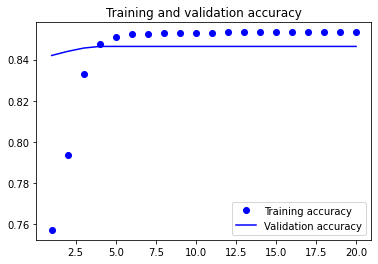

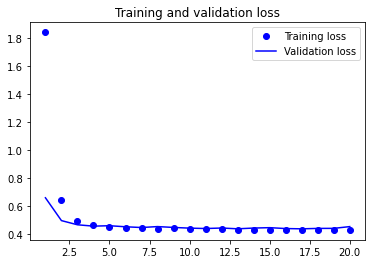

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("staggered_balconies_01.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

116/116 [==============================] - 5s 43ms/step - loss: 0.4267 - accuracy: 0.8477
Test accuracy: 0.848


In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.RandomZoom(0.5)
    ]
)

In [ ]:
#Define the model with data augmentation.
inputs = keras.Input(shape=(400, 400, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5),
              metrics=["accuracy"])

callbacks = [
             keras.callbacks.ModelCheckpoint(
                 filepath="staggered_balconies_01_with_augmentation.keras",
                 save_best_only=True,
                 monitor="val_loss")
]
history = model.fit(train_dataset, epochs=30,
                    validation_data=validation_dataset,
                    callbacks=callbacks)


Epoch 1/30
313/313 [==============================] - 52s 157ms/step - loss: 0.4376 - accuracy: 0.8526 - val_loss: 0.4344 - val_accuracy: 0.8464
Epoch 2/30
313/313 [==============================] - 46s 147ms/step - loss: 0.4240 - accuracy: 0.8532 - val_loss: 0.4340 - val_accuracy: 0.8464
Epoch 3/30
313/313 [==============================] - 47s 148ms/step - loss: 0.4239 - accuracy: 0.8532 - val_loss: 0.4338 - val_accuracy: 0.8464
Epoch 4/30
313/313 [==============================] - 47s 149ms/step - loss: 0.4230 - accuracy: 0.8532 - val_loss: 0.4337 - val_accuracy: 0.8464
Epoch 5/30
313/313 [==============================] - 47s 149ms/step - loss: 0.4227 - accuracy: 0.8532 - val_loss: 0.4335 - val_accuracy: 0.8464
Epoch 6/30
313/313 [==============================] - 47s 148ms/step - loss: 0.4225 - accuracy: 0.8532 - val_loss: 0.4335 - val_accuracy: 0.8464
Epoch 7/30
313/313 [==============================] - 47s 148ms/step - loss: 0.4219 - accuracy: 0.8532 - val_loss: 0.4333 - val_ac

In [ ]:
#Defining a basic image classification convnet. 
#There are 2 output layers - "present" and "absent".
#The input data is a 400x400x3 image.

from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(400, 400,3))
data_augmentation = keras.Sequential(
    [
     layers.RandomRotation(0.15),
     layers.RandomZoom(0.3)
    ]
)
x = layers.Rescaling(1./255.0) (inputs)
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5),
              metrics=["accuracy"])

callbacks = [
             keras.callbacks.ModelCheckpoint(filepath="staggered_balconies_01.keras",
                                             save_best_only=True,
                                             monitor="val_loss")
]

model.summary()

history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, callbacks=callbacks)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 400, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                         

In [ ]:
test_model = keras.models.load_model("staggered_balconies_01.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

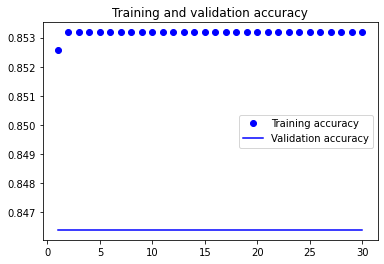

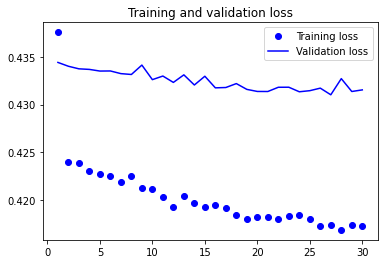

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()